<a href="https://colab.research.google.com/github/Shrey1410/minor_proj/blob/main/Minor_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d mohitsingh1804/plantvillage

Dataset URL: https://www.kaggle.com/datasets/mohitsingh1804/plantvillage
License(s): GPL-2.0
 98% 798M/818M [00:07<00:00, 105MB/s]
100% 818M/818M [00:07<00:00, 110MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantvillage.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/PlantVillage/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/PlantVillage/val",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 43444 files belonging to 38 classes.
Found 10861 files belonging to 38 classes.


In [12]:
def process(image , label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [30]:
# Create CNN Model

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(38, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │      15,745,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,766,950 (60.15 MB)

 Trainable params: 15,766,950 (60.15 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(train_ds,
                    epochs=5,
                    validation_data=val_ds
                    )

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.0956 - loss: 3.3837 - val_accuracy: 0.0986 - val_loss: 22.1059
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 70s 51ms/step - accuracy: 0.0992 - loss: 3.3568 - val_accuracy: 0.0986 - val_loss: 24.2875
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.0995 - loss: 3.3545 - val_accuracy: 0.1099 - val_loss: 25.2648
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.0985 - loss: 3.3554 - val_accuracy: 0.0986 - val_loss: 25.1801
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - accuracy: 0.0989 - loss: 3.3555 - val_accuracy: 0.0986 - val_loss: 24.5547


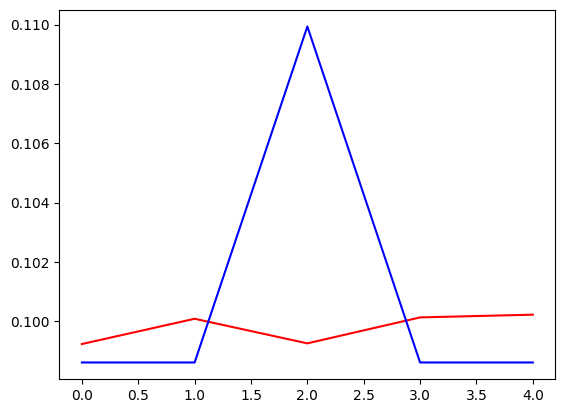

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')